<b><font size="6">|010|Logistic Regression|Purchasing Health Insurance</font></b>

* **Author**: Dino Giovannoni
* **Date:**: 11-July-2024


**The Problem:** 

This problem will attempt to predict the categories of people that purchase health insurance based on age.

In [24]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Import the dataset

In [25]:
df = pd.read_csv('HealthInsurance.csv')

In [26]:
display(df.head())
display(df.info())

,Age,Purchased Health Insurance
0,46,1
1,32,0
2,66,1
3,43,1
4,37,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         136 non-null    int64
 1   Purchased Health Insurance  136 non-null    int64
dtypes: int64(2)
memory usage: 2.2 KB


None

In [27]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,136.0,41.022059,14.590442,18.0,28.0,41.0,52.25,70.0
Purchased Health Insurance,136.0,0.448529,0.499182,0.0,0.0,0.0,1.00,1.0


## Histogram Plots

Let's plot the histogram using **matplotlib**.

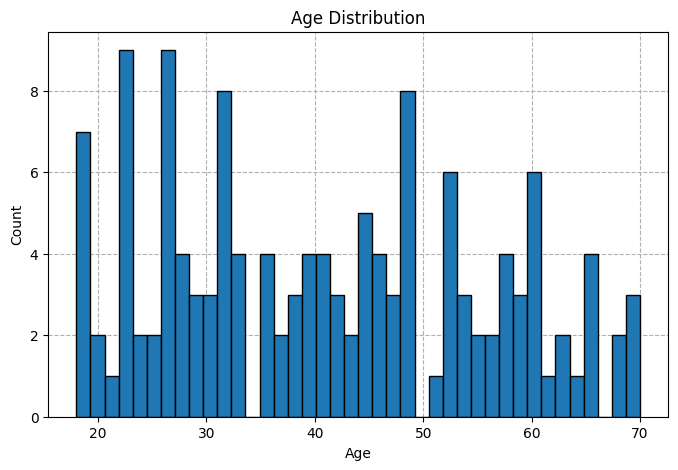

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
_ = plt.hist(df["Age"], bins=40, edgecolor='black', linewidth=1)
plt.grid(linestyle="--", zorder=0)
plt.gca().set_axisbelow(True)  # Ensure grid lines are drawn below the bars
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Scatter Plots

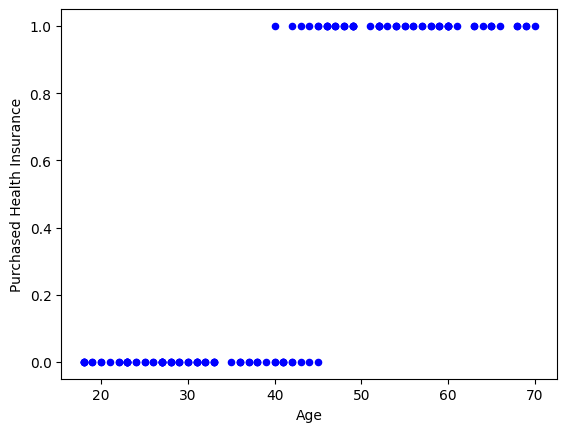

In [29]:
ax = df.plot.scatter(x='Age', y='Purchased Health Insurance', c='blue')

# Model

In [30]:
X = np.array(df["Age"]).reshape(-1, 1)
y = np.array(df["Purchased Health Insurance"])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Fit Logistic Regression Model

In [32]:
model = LogisticRegression(random_state = 0, solver='lbfgs' )
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [33]:
model.coef_

array([[0.93088033]])

## The Confusion Matrix

### Training Data

[[58  2]
 [ 2 40]]
Training Prediction Accuracy: 96.1%


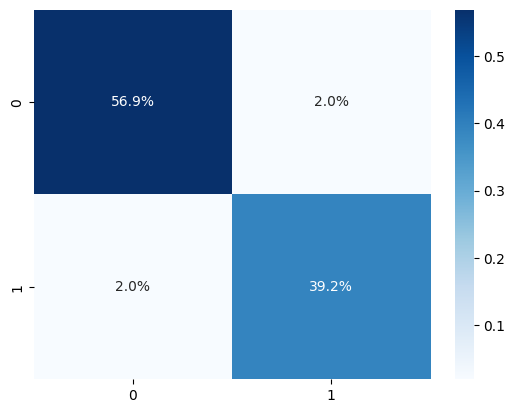

In [34]:
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
cm_train_prob = cm_train/np.sum(cm_train)
_ = sns.heatmap(cm_train_prob, annot=True,cmap='Blues', fmt='.1%')
print(f'Training Prediction Accuracy: {np.round(100*(cm_train_prob[0][0] + cm_train_prob[1][1]),1)}%')


### Test Data

[[15  0]
 [ 1 18]]
For the following test values: [52 37 60 32 48 23 47 19 26 60 49 28 30 33 65 18 64 40 18 49 61 36 59 33
 23 60 60 45 39 55 66 51 20 52]
Test Prediction Accuracy: 97.1%


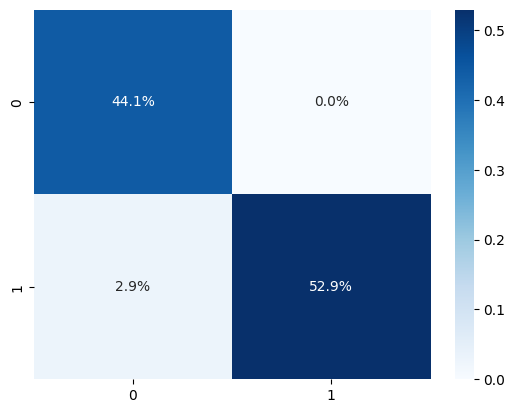

In [35]:
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
cm_test_prob = cm_test/np.sum(cm_test)
_ = sns.heatmap(cm_test_prob, annot=True,cmap='Blues', fmt='.1%')

print(f'For the following test values: {X_test.flatten()}')
print(f'Test Prediction Accuracy: {np.round(100*(cm_test_prob[0][0] + cm_test_prob[1][1]),1)}%')


The accuracy can also be calculated using a sklearn function:

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {np.round(100*accuracy, 1)}%')

Accuracy: 97.1%


## Plot All data

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [38]:
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import root_scalar
def calculate_thresholdX(x_values, y_values, threshold = 0.5):

    # Example data arrays
    y = S-threshold
    x = x_values
    # Interpolate the data
    spline = InterpolatedUnivariateSpline(x, y)

    # Define a function for the spline
    def f(x):
        return spline(x)

    # Find the roots using a root-finding algorithm
    roots = []
    for i in range(len(x) - 1):
        if y[i] * y[i+1] <= 0:  # Check if there is a sign change
            root_result = root_scalar(f, bracket=[x[i], x[i+1]])
            if root_result.converged:
                roots.append(root_result.root)
    return roots

Threshhold: 43.57


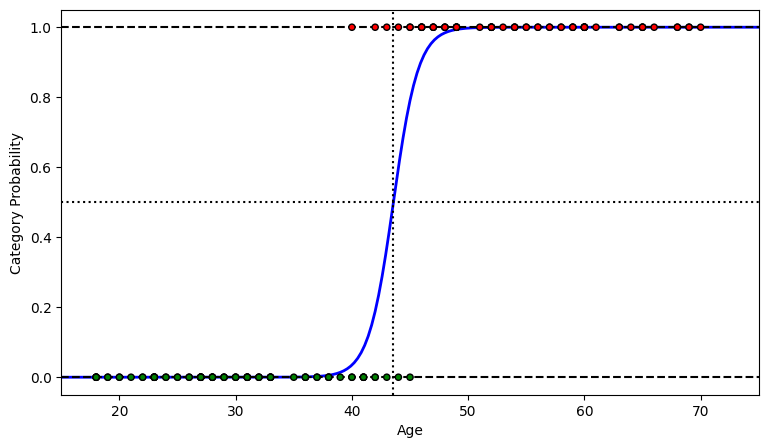

In [39]:
colors = ['green' if value == 0 else 'red' for value in y]

plt.figure(1, figsize=(9, 5))

plt.scatter(X.ravel(), y,  zorder=20, s=20, c = colors, edgecolor='black')

X_plot = np.linspace(15, 75, 201)
S = sigmoid(X_plot * model.coef_ + model.intercept_).ravel()

X_thresh = calculate_thresholdX(X_plot, S)[0]
print(f"Threshhold: {np.round(X_thresh,2)}" )

plt.plot(X_plot, S, color='blue', linewidth=2)
plt.axhline(y=0, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')
plt.axhline(y=0.5, color='k', linestyle='dotted')
plt.axvline(x=X_thresh, color='k', linestyle='dotted')

plt.ylabel('Category Probability')
plt.xlabel('Age')
plt.xlim(15, 75)
plt.show()

## Calculating a probability

### Using the sigmoid function

In [40]:
age_value = 44
prob_value = sigmoid(age_value * model.coef_ + model.intercept_)[0][0]
print(f'The probability of somebody of age {age_value} purchasing health insurance is {np.round(100*prob_value,1)}%')

The probability of somebody of age 44 purchasing health insurance is 59.9%


### Using the model predictor

In [44]:
X_point = np.array([age_value]).reshape(-1, 1)

In [46]:
predicted_probability = model.predict_proba(X_point)[:, 1]
print(f'The probability of somebody of age {age_value} purchasing health insurance is {np.round(100*predicted_probability,1)}%')



The probability of somebody of age 44 purchasing health insurance is [59.9]%
